In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL1BhdHRvblAvc291cmNlL3JlcG9zL3BoaWxwYXR0b24uZ2l0aHViLmlv'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/PattonP/miniforge3/envs/nut/lib/python3.13/importlib/_bootstrap.py": 1761176675.6447315, "/Users/PattonP/miniforge3/envs/nut/lib/python3.13/importlib/_bootstrap_external.py": 1761176675.637137, "/Users/PattonP/miniforge3/envs/nut/lib/python3.13/zipimport.py": 1761176672.6226385, "/Users/PattonP/miniforge3/envs/nut/lib/python3.13/codecs.py": 1761176671.560341, "/Users/PattonP/miniforge3/envs/nut/lib/python3.13/encodings/aliases.py": 1761176673.6707778, "/Users/PattonP/miniforge3/envs/nut/lib/python3.13/encodings/__init__.py": 1761176673.664377, "/Users/PattonP/miniforge3/envs/nut/lib/python3.13/encodings/utf_8.py": 1761176674.6567698, "/Users/PattonP/miniforge3/envs/nut/lib/python3.13/abc.py": 1761176671.4115756, "/Users/PattonP/miniforge3/envs/nut/lib/python3.13/io.py": 1761176671.9084682, "/Users/PattonP/miniforge3/envs/nut/lib/python3.13/stat.py": 1761176672.327954, "/Users/PattonP/miniforge3/envs/nut/lib/python3.13/_collections_abc.py": 1761176671.2647672, "/Users/PattonP/m

In [2]:
%config InlineBackend.figure_format = 'retina'

# relevant libraries
import numpy as np
import pymc as pm
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt

# only necessary on MacOS Sequoia
# https://discourse.pymc.io/t/pytensor-fails-to-compile-model-after-upgrading-to-mac-os-15-4/16796/5
import pytensor
pytensor.config.cxx = '/usr/bin/clang++'

# plotting styles
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

def scale(x):
    '''Scale x: 0 is the mean and 1 is one standard deviation from the mean.'''
    return (x - np.nanmean(x)) / np.nanstd(x)

def invlogit(x):
    '''Compute inverse logit of x.'''
    return 1 / (1 + np.exp(-x))

def sim_y(p, z, site_count, visit_count):
    '''Simulate detections given detection probability p and occurrence state z.'''
    ones = np.ones((site_count, visit_count))
    p_array = p * ones

    flips = rng.binomial(1, p_array)
    y = (flips.T * z_true).T

    return y

## simulation

SEED = 808
rng = np.random.default_rng(seed=SEED)

# sampling characteristics
site_count = 200
visit_count = 3

## ecological model

# true parameter values
psi_true = 0.8

# simulate occurrence state
z_true = rng.binomial(1, psi_true, size=site_count)

## detection model

# true parameter values
p_true = 0.5

# simulate detection
y = sim_y(p_true, z_true, site_count, visit_count)

# number of detections at each site
y_summarized = y.sum(axis=1)

# detection data at the first five sites
y[:5]

array([[0, 1, 1],
       [1, 0, 1],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 1]])

In [3]:
with pm.Model() as constant:

    # priors for the detetion and occurrence probabilities\
    psi = pm.Uniform('psi', 0, 1)
    p = pm.Uniform('p', 0, 1)

    # likelihood for the summarized data
    pm.ZeroInflatedBinomial('y', p=p, psi=psi, n=visit_count,
                            observed=y_summarized)

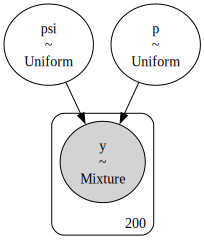

In [4]:
#| fig-cap: Visual representation of model $p(\cdot)\psi(\cdot).$ `MarginalMixture` refers to the zero-inflated binomial distribution.
#| label: fig-pdot

pm.model_to_graphviz(constant)

In [5]:
with constant:
    constant_idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [psi, p]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


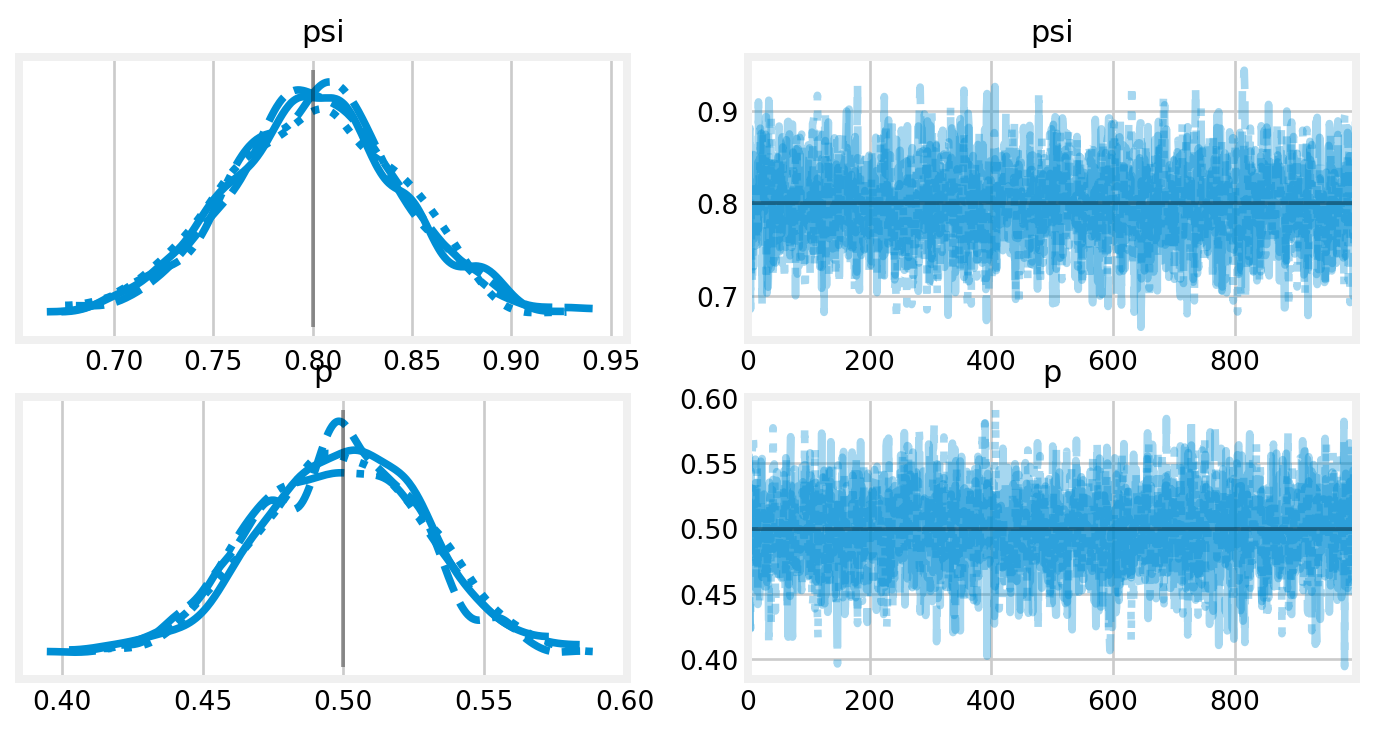

In [6]:
#| fig-cap: Traceplots for the $p(\cdot)\psi(\cdot)$ model. The true parameter values are shown by vertical and horizontal lines.
#| label: fig-pdot_trace
az.plot_trace(
    constant_idata,
    compact=True,
    figsize=(8,4),
    lines=[("psi", {}, [psi_true]), ("p", {}, [p_true])]
);

In [7]:
az.summary(constant_idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
psi,0.800,0.043,0.720,0.883,0.001,0.001,2097.0,2125.0,1.0
p,0.499,0.030,0.443,0.554,0.001,0.000,2486.0,2448.0,1.0


In [8]:
## ecological model

# true parameter values
beta0_true = -1
beta1_true = 3

# covariates
x = scale(rng.uniform(size=site_count))

# linear model
mu_true = beta0_true + beta1_true * x
psi_true = invlogit(mu_true)

# simulate occurrence state
z_true = rng.binomial(1, psi_true)

## detection model

# true parameter values
p_true = 0.75

# simulate detection
y = sim_y(p_true, z_true, site_count, visit_count)

# vector with the number of detections at each site
y_summarized = y.sum(axis=1)

# detection data at the first five sites
y[:5]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

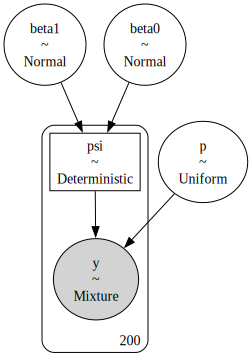

In [9]:
#| fig-cap: Visual representation of model $p(\cdot)\psi(x).$ `MarginalMixture` refers to the zero-inflated binomial distribution.
#| label: fig-psix
with pm.Model() as psix:

    # occurrence process
    # priors
    beta0 = pm.Normal("beta0", mu=0, sigma=2)
    beta1 = pm.Normal("beta1", mu=0, sigma=2)

    # linear model
    mu = beta0 + beta1 * x
    psi = pm.Deterministic("psi", pm.math.invlogit(mu))

    # detection process
    # prior
    p = pm.Uniform('p', 0, 1)

    # likelihood for the summarized data
    pm.ZeroInflatedBinomial('y', p=p, psi=psi, n=visit_count,
                            observed=y_summarized)

pm.model_to_graphviz(psix)

In [10]:
with psix:
    psix_idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [beta0, beta1, p]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


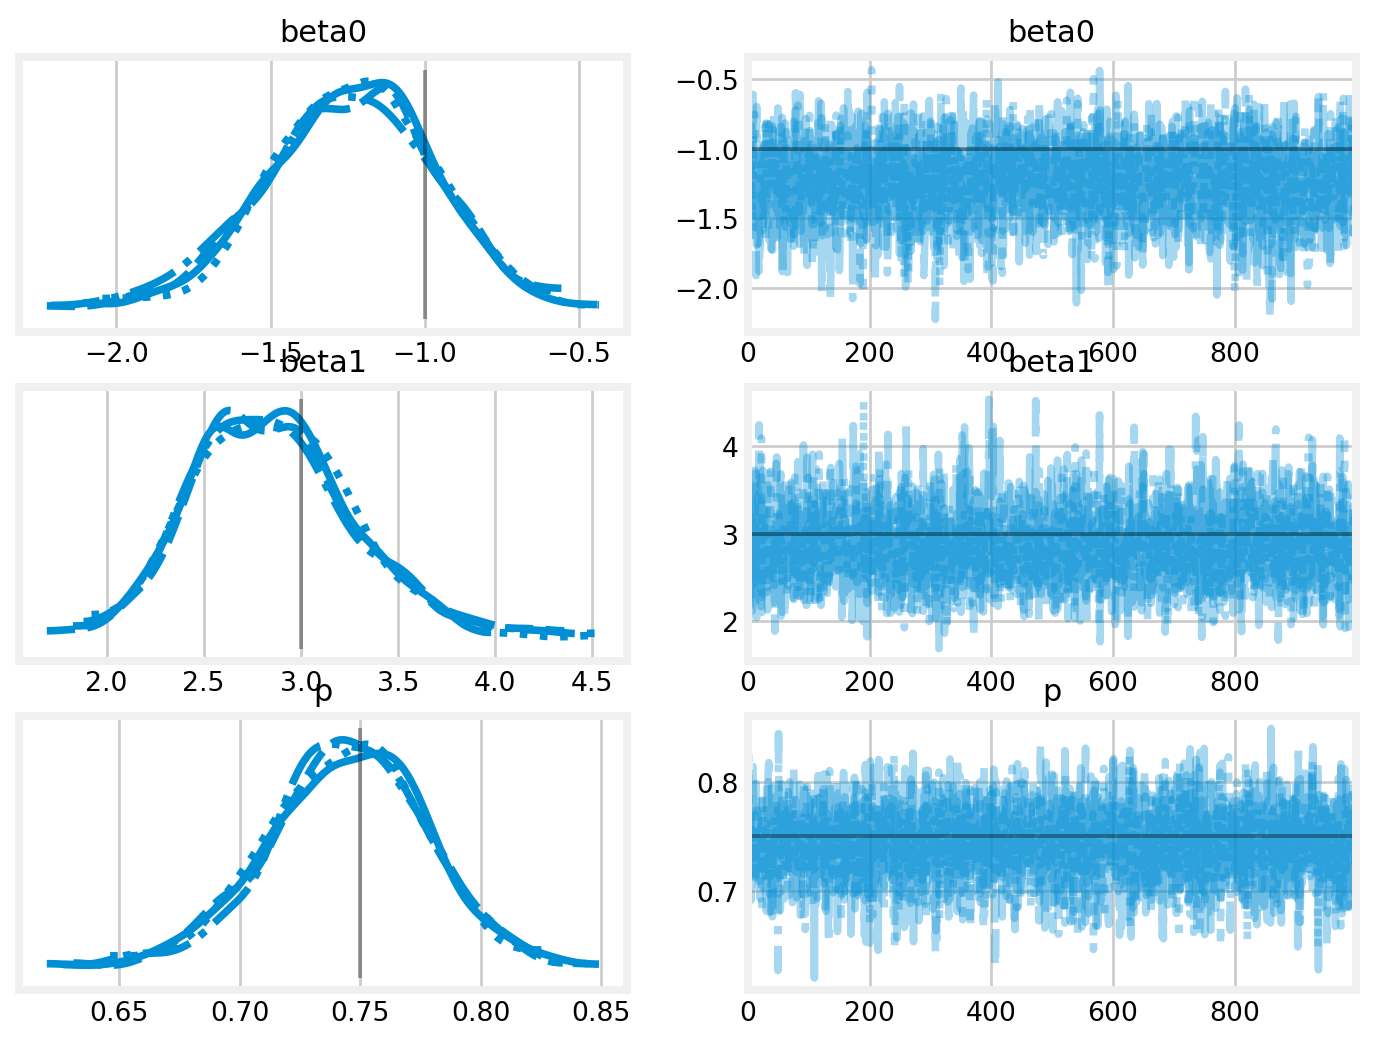

In [11]:
#| fig-cap: Traceplots for the $p(\cdot)\psi(x)$ model. The true parameter values are shown by vertical and horizontal lines
#| label: psix_trace
az.plot_trace(
    psix_idata,
    figsize=(8,6),
    var_names=['beta0', 'beta1', 'p'],
    lines=[("beta0", {}, [beta0_true]), ("beta1", {}, [beta1_true]),
           ('p', {}, [p_true])]
);

In [12]:
az.summary(psix_idata, var_names=['beta0', 'beta1', 'p'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,-1.241,0.266,-1.723,-0.744,0.005,0.004,2815.0,2566.0,1.0
beta1,2.858,0.408,2.156,3.657,0.008,0.006,2775.0,3017.0,1.0
p,0.744,0.032,0.683,0.804,0.000,0.001,4635.0,2970.0,1.0


In [13]:
## ecological model

# true parameter values
beta0_true = -1
beta1_true = 3

# covariates
x = scale(rng.uniform(size=site_count))

# linear model
mu_true = beta0_true + beta1_true * x
psi_true = invlogit(mu_true)

# simulate occurrence state
z_true = rng.binomial(1, psi_true)

# true parameter values
alpha0_true = 1
alpha1_true = -3

# covariates
w = rng.uniform(size=site_count * visit_count).reshape(site_count, visit_count)
w = scale(w)

# linear model
nu_true = alpha0_true + alpha1_true * w
p_true = invlogit(nu_true)

# simulate detection
y = sim_y(p_true, z_true, site_count, visit_count)

print(y.shape)
y[:5]

(200, 3)


array([[0, 0, 0],
       [0, 0, 0],
       [0, 1, 1],
       [1, 1, 0],
       [0, 0, 0]])

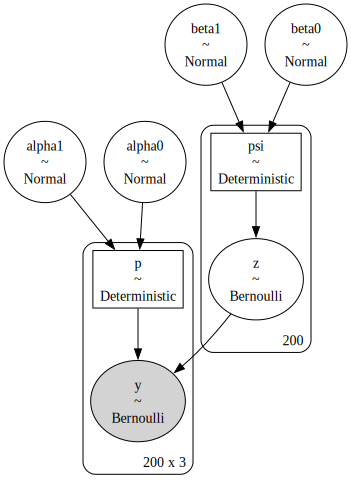

In [14]:
#| fig-cap: Visual representation of the $p(w)\psi(w)$ model.
#| label: fig-pw
with pm.Model() as binary_gibbs:

    # occurrence process
    # priors
    beta0 = pm.Normal("beta0", mu=0, sigma=2)
    beta1 = pm.Normal("beta1", mu=0, sigma=2)

    # linear model
    mu = beta0 + beta1 * x
    psi = pm.Deterministic("psi", pm.math.invlogit(mu))

    # detection process
    # priors
    alpha0 = pm.Normal('alpha0', mu=0, sigma=2)
    alpha1 = pm.Normal('alpha1', mu=0, sigma=2)

    # linear model
    nu = alpha0 + alpha1 * w
    p = pm.Deterministic('p', pm.math.invlogit(nu))

    # occupied / unoccupied state at each site
    z = pm.Bernoulli("z", psi)

    # [:, None] allows us to multiply a vector across every column of a matrix
    mu_y = z[:, None] * p

    # the likelihood is now bernoulli conditional on the z state
    pm.Bernoulli("y", mu_y, observed=y)

pm.model_to_graphviz(binary_gibbs)

In [15]:
with binary_gibbs:
    binary_gibbs_idata = pm.sample()
az.summary(binary_gibbs_idata, var_names=['beta0', 'beta1', 'alpha0', 'alpha1'])

Multiprocess sampling (4 chains in 4 jobs)


CompoundStep


>NUTS: [beta0, beta1, alpha0, alpha1]


>BinaryGibbsMetropolis: [z]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


/Users/PattonP/miniforge3/envs/nut/lib/python3.13/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,-0.746,0.244,-1.211,-0.305,0.004,0.004,3237.0,2897.0,1.0
beta1,2.803,0.401,2.089,3.556,0.008,0.006,2680.0,2614.0,1.0
alpha0,1.389,0.270,0.898,1.905,0.006,0.004,2052.0,2161.0,1.0
alpha1,-3.070,0.381,-3.780,-2.378,0.008,0.006,2432.0,2462.0,1.0


In [16]:
import pymc_extras as pmx
marginal = pmx.marginalize(binary_gibbs, ["z"])

with marginal:
    marginal_idata = pm.sample()

az.summary(marginal_idata, var_names=['beta0', 'beta1', 'alpha0', 'alpha1'])

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [alpha1, alpha0, beta1, beta0]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,-0.751,0.240,-1.175,-0.284,0.005,0.004,2691.0,2694.0,1.0
beta1,2.796,0.400,2.061,3.542,0.008,0.007,2829.0,2236.0,1.0
alpha0,1.403,0.278,0.878,1.922,0.005,0.004,3239.0,3031.0,1.0
alpha1,-3.092,0.382,-3.785,-2.349,0.007,0.005,3059.0,2975.0,1.0


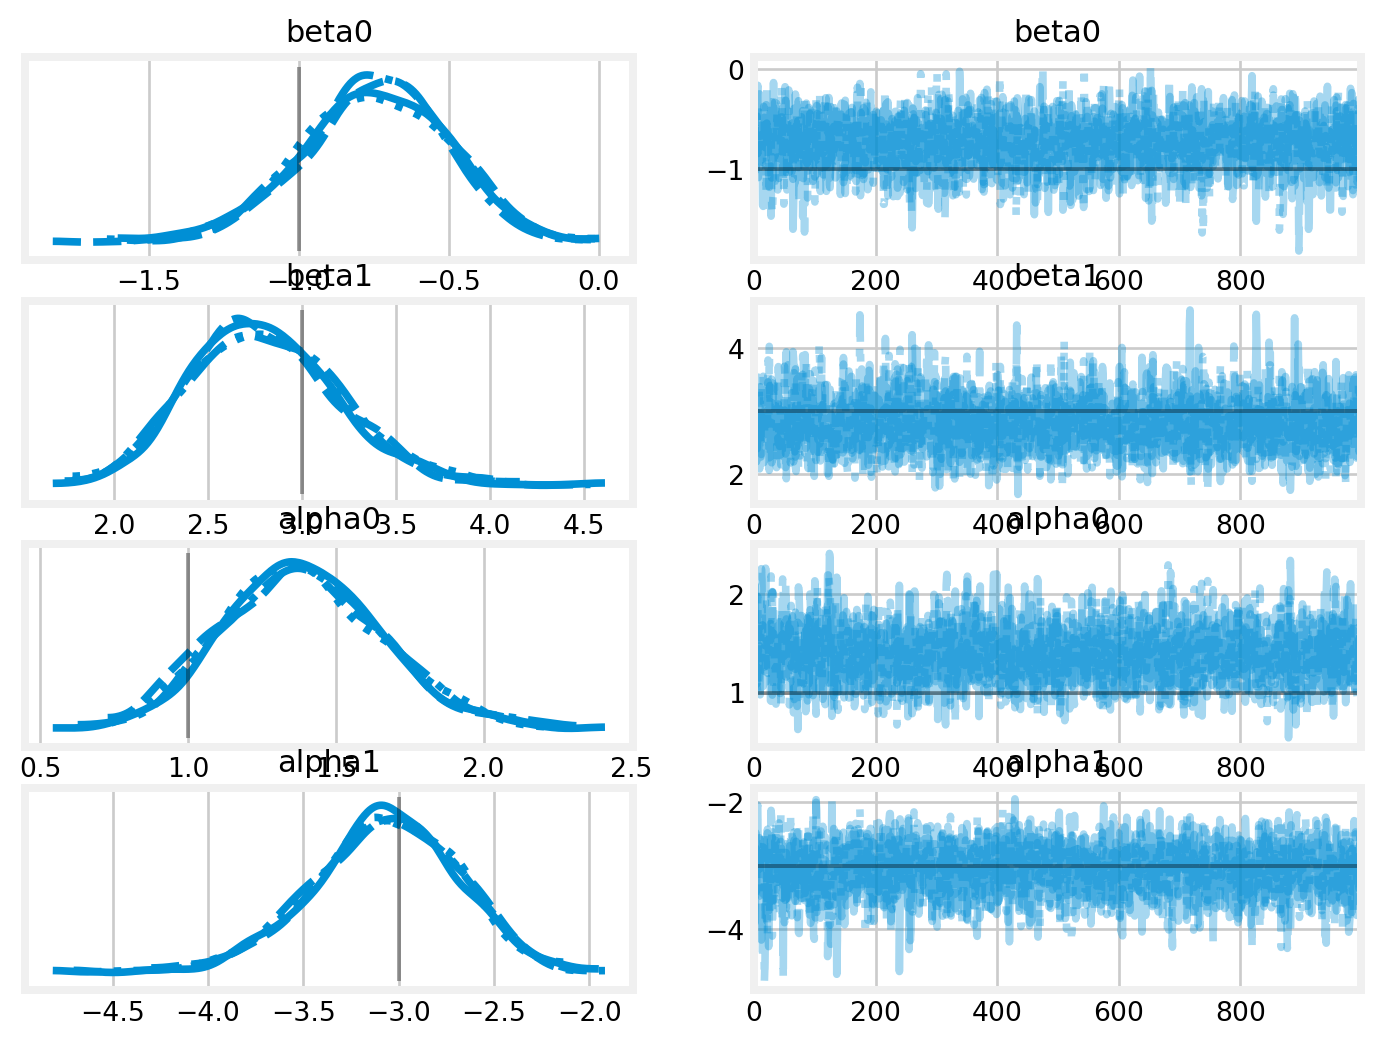

In [17]:
#| fig-cap: Tracepots for the $p(w)\psi(x)$ model. The true parameter values are shown by vertical and horizontal lines
#| label: fig-pw_trace
az.plot_trace(
    binary_gibbs_idata,
    figsize=(8,6),
    var_names=['beta0', 'beta1', 'alpha0', 'alpha1'],
    lines=[("beta0", {}, [beta0_true]), ("beta1", {}, [beta1_true]),
           ('alpha0', {}, [alpha0_true]), ('alpha1', {}, [alpha1_true])]
);

In [18]:
# read in the data
data = pd.read_csv('PlosOne-DataFinnmark.csv')

# subset the data to select willow warbler
is_warbler = data.Species == "Willow Warbler"
Y = data.loc[is_warbler, ['Y05.1', 'Y05.2', 'Y05.3']].to_numpy()
n, J = Y.shape

# generate site covariate matrix
site_intercept = np.ones(n)
pland = scale(data.loc[is_warbler, 'Pland']).to_numpy()
wheight = scale(data.loc[is_warbler, 'wheight']).to_numpy()

X = np.c_[site_intercept, pland, wheight]

# generate visit covariate array
visit_int = np.ones_like(Y)
visit_wheight = np.repeat(wheight, repeats=J).reshape(n, J)

# indicates which visit this is [0, 1, 2, 0, ...]
_, visit_indicator = np.indices(Y.shape)
visit_indicator = scale(visit_indicator)

W = np.stack((visit_int, visit_indicator, visit_wheight), axis=2)

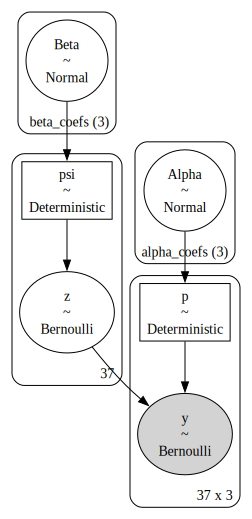

In [19]:
#| fig-cap: Visual representation of the willow warbler occupancy model.
#| label: fig-warbler
coords = {"beta_coefs": ["Intercept", "Pland", 'Wheight'],
          "alpha_coefs": ["Intercept", "Visit", 'Wheight']}

with pm.Model(coords=coords) as warbler:

    # occurrence process priors
    Beta = pm.Normal("Beta", mu=0, sigma=2, dims="beta_coefs")

    # linear model
    mu = pm.math.dot(X, Beta)
    psi = pm.Deterministic("psi", pm.math.invlogit(mu))

    # detection process priors
    Alpha = pm.Normal('Alpha', mu=0, sigma=2, dims='alpha_coefs')

    # linear model
    nu = pm.math.dot(W, Alpha)
    p = pm.Deterministic('p', pm.math.invlogit(nu))

    # occupied / unoccupied state at each site
    z = pm.Bernoulli("z", psi)

    # [:, None] allows us to multiply a vector across every column of a matrix
    mu_y = z[:, None] * p

    # the likelihood is now bernoulli conditional on the z state
    pm.Bernoulli("y", mu_y, observed=Y)

pm.model_to_graphviz(warbler)

In [20]:
warbler_marginal = pmx.marginalize(warbler, ['z'])
with warbler_marginal:
    warbler_idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [Alpha, Beta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [21]:
az.summary(warbler_idata, var_names=['Alpha', 'Beta'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Alpha[Intercept],-0.018,0.373,-0.718,0.674,0.007,0.005,2640.0,3053.0,1.0
Alpha[Visit],0.470,0.278,-0.047,0.994,0.005,0.004,3405.0,2879.0,1.0
Alpha[Wheight],0.746,0.434,-0.063,1.569,0.008,0.006,2917.0,3262.0,1.0
Beta[Intercept],0.813,0.819,-0.650,2.338,0.017,0.015,2668.0,2145.0,1.0
Beta[Pland],2.256,0.868,0.787,3.875,0.018,0.018,2675.0,1955.0,1.0
Beta[Wheight],0.964,0.685,-0.414,2.214,0.013,0.011,2873.0,2507.0,1.0


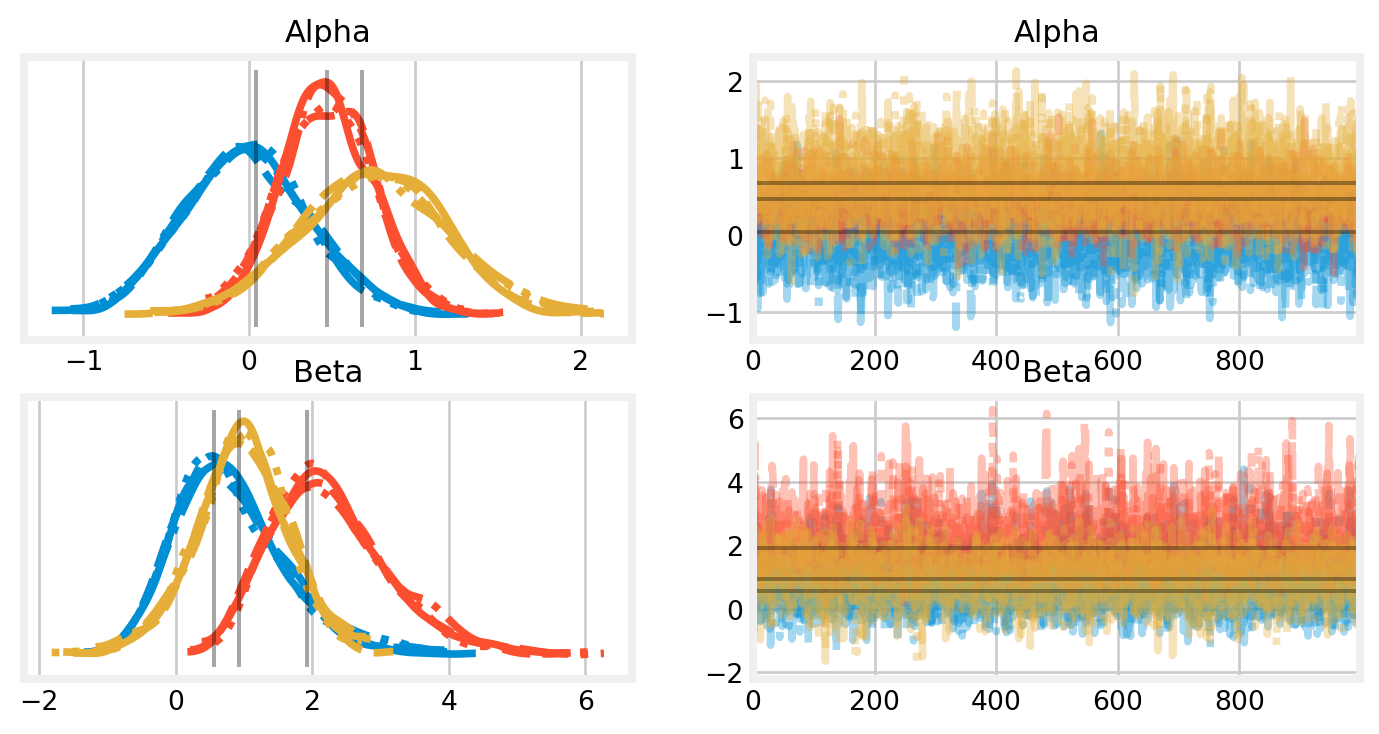

In [22]:
#| fig-cap: Traceplots from the willow warbler occupancy model. Estimates from @hooten2019 are shown by vertical and horizontal lines.
#| label: fig-warbler_trace

alpha_hat_hooten =  [0.04, 0.47, 0.68]
beta_hat_hooten = [0.56, 1.92, 0.93]

az.plot_trace(
    warbler_idata,
    figsize=(8,4),
    var_names=['Alpha', 'Beta'],
    lines=[("Alpha", {}, [alpha_hat_hooten]),
           ("Beta", {}, [beta_hat_hooten])]
);

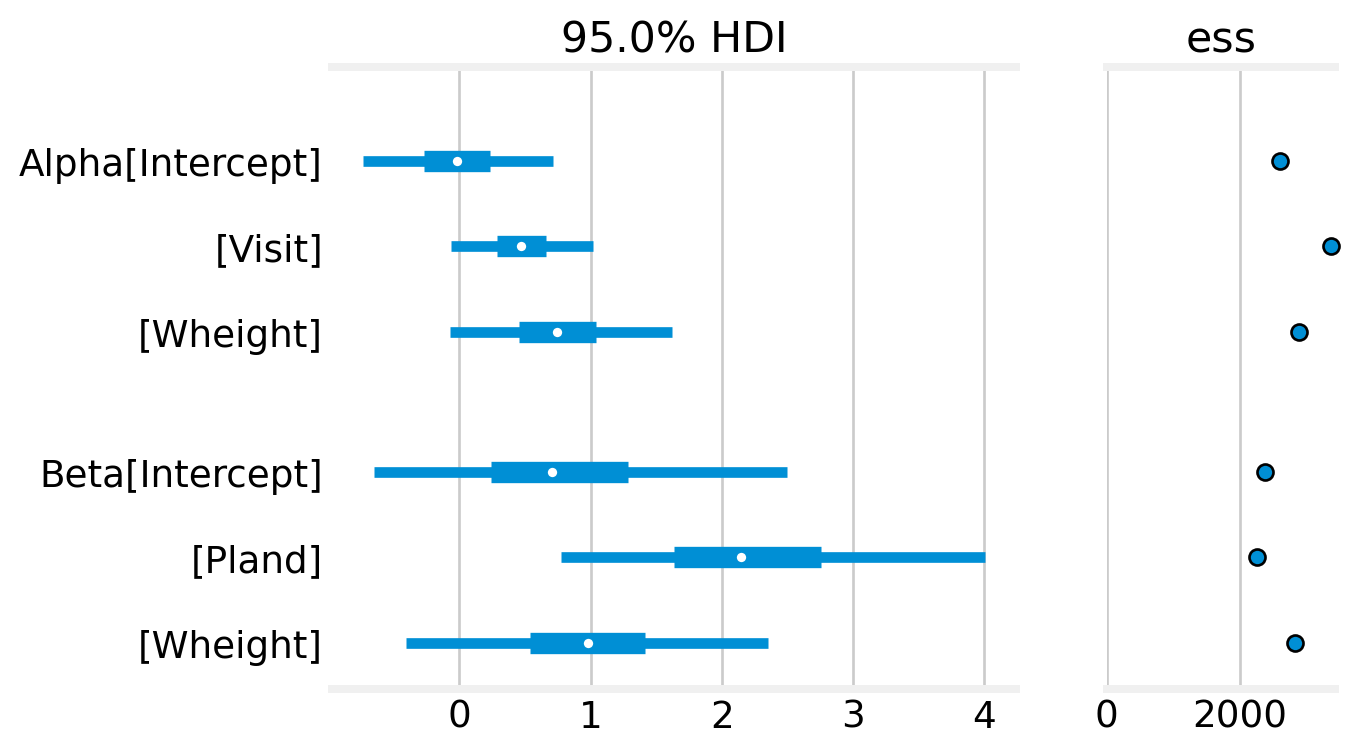

In [23]:
#| fig-cap: Forest plots from willow warbler occupancy model. ESS refers to the effective sample size.
#| label: fig-warbler_forest
az.plot_forest(warbler_idata, var_names=['Alpha', "Beta"],
               figsize=(6,4),
               hdi_prob=0.95, ess=True, combined=True);

In [24]:
%load_ext watermark

%watermark -n -u -v -iv -w

Last updated: Wed Jan 14 2026

Python implementation: CPython
Python version       : 3.13.9
IPython version      : 9.7.0

matplotlib : 3.10.8
arviz      : 0.22.0
pytensor   : 2.35.1
pymc_extras: 0.6.0
pandas     : 2.3.3
numpy      : 2.3.5
pymc       : 5.26.1

Watermark: 2.5.0

